In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 10.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

## Load books

In [4]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('2022') if '.txt' in b.name]

In [5]:
all_books

[<DirEntry '2022.txt'>]

In [6]:
book = all_books[0]
# book = cryptojacking
book_text = open(book).read()
print(book_text)

Google Cloud launches agentless cryptojacking malware scanner
The new security feature is designed to hunt down instances of cryptojacking.
What to expect from MWC 2024

Google Cloud has announced a new security feature designed to hunt down instances of cryptojacking.

On Monday, the tech giant said the public preview of Virtual Machine Threat Detection (VMTD) is now available in the Security Command Center (SCC). The SCC is a platform for detecting threats against cloud assets by scanning for security vulnerabilities and misconfigurations. 

more crypto
How do I buy Bitcoin? Here's how it works
The best crypto credit cards
Top crypto exchanges: The ones you need to know
Must-have cryptocurrency hardware wallets: Keep your cryptocurrency safe
Timothy Peacock, Product Manager at Google Cloud, said that as organizations continue to migrate to the cloud, workloads are often handled with VM-based architectures. 

Cloud environments are also a prime target for cyberattackers seeking out va

In [7]:
all_entities = NER(book_text)

In [8]:
entity_types_to_remove = ["CARDINAL", "TIME", "DATE", "ORDINAL", "QUANTITY", "PERCENT", "MONEY"]
filtered_entities =[ent.text for ent in all_entities.ents if ent.label_ not in entity_types_to_remove]
print(filtered_entities)

['Google Cloud', 'MWC 2024', 'Google Cloud', 'Virtual Machine Threat Detection', 'the Security Command Center', 'SCC', 'Bitcoin', 'Timothy Peacock', 'Google Cloud', 'XMRig', 'Monero', 'XMR', 'Google', 'Threat Horizons', 'Google Cloud', 'VMTD', 'Peacock', 'Google', 'VMTD', 'Google Cloud', 'VMTD', 'Target', 'Docker', 'AWS', 'Kubernetes', 'Reconnaissance\nCredential Stealing\nInstalling', 'Maintain', 'Cryptojacking', 'Network/ Port', 'Malicious Binaries\nPackers', 'Crypters\nCredential Stealers', 'Twitter', 'Twitter', 'Tools', 'Germany', 'German', 'Deutschland', 'German', 'Information', 'OSINT', 'Tweet', '’s Tweet', 'CloudSEK', 'Domain', 'Redis', 'Domain', 'Wayback Machine\nTimeline', 'Redis', 'Attack', 'Redis', 'Tsunami', 'titan', 'DDoS', 'Linux', 'SSH', 'SSH', 'Redis', 'Redis campaign[/caption', 'Docker Attacks', 'Docker', 'Bash', 'i.e', 'TCP', 'Docker', 'masscan', 'Alpine', 'width="2048"]Targeting Docker Instances', 'Targeting Docker Instances', 'Improvised Docker Attacks', 'Docker', '

In [9]:
# Visualize identified entities
displacy.render(all_entities[0:2000], style="ent", jupyter=True)

## Get named entity list per sentence

In [10]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in all_entities.sents:
    entity_list = [ent.text for ent in sent.ents if ent.label_ not in entity_types_to_remove]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)
print(sent_entity_df.head(10))

                                            sentence  \
0  (Google, Cloud, launches, agentless, cryptojac...   
1  (The, new, security, feature, is, designed, to...   
2  (What, to, expect, from, MWC, 2024, \n\n, Goog...   
3  (On, Monday, ,, the, tech, giant, said, the, p...   
4  (The, SCC, is, a, platform, for, detecting, th...   
5    (more, crypto, \n, How, do, I, buy, Bitcoin, ?)   
6  (Here, 's, how, it, works, \n, The, best, cryp...   
7  (Cloud, environments, are, also, a, prime, tar...   
8  (Cryptocurrency, miners, such, as, XMRig, are,...   
9  (When, in, the, hands, of, threat, actors, ,, ...   

                                            entities  
0                                     [Google Cloud]  
1                                                 []  
2                           [MWC 2024, Google Cloud]  
3  [Virtual Machine Threat Detection, the Securit...  
4                                              [SCC]  
5                                          [Bitcoin] 

In [11]:
sent_entity_df

,sentence,entities
0,"(Google, Cloud, launches, agentless, cryptojac...",[Google Cloud]
1,"(The, new, security, feature, is, designed, to...",[]
2,"(What, to, expect, from, MWC, 2024, \n\n, Goog...","[MWC 2024, Google Cloud]"
3,"(On, Monday, ,, the, tech, giant, said, the, p...","[Virtual Machine Threat Detection, the Securit..."
4,"(The, SCC, is, a, platform, for, detecting, th...",[SCC]
...,...,...
257,"(Alternatively, ,, customers, could, use, AWS,...",[]
258,"(The, solution, can, be, extended, by, using, ...",[AWS IoT Device Defender]
259,"(You, can, read, about, other, security, use, ...",[]
260,"(In, addition, to, using, AWS, IoT, Device, De...","[IIoT, Securing IoT, AWS IoT Lens]"


In [12]:
# Filter out sentences that don't have any entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities
0,"(Google, Cloud, launches, agentless, cryptojac...",[Google Cloud]
2,"(What, to, expect, from, MWC, 2024, \n\n, Goog...","[MWC 2024, Google Cloud]"
3,"(On, Monday, ,, the, tech, giant, said, the, p...","[Virtual Machine Threat Detection, the Securit..."
4,"(The, SCC, is, a, platform, for, detecting, th...",[SCC]
5,"(more, crypto, \n, How, do, I, buy, Bitcoin, ?)",[Bitcoin]
6,"(Here, 's, how, it, works, \n, The, best, cryp...","[Timothy Peacock, Google Cloud]"
8,"(Cryptocurrency, miners, such, as, XMRig, are,...",[XMRig]
11,"(Cryptocurrency, including, Monero, (, XMR, ),...","[Monero, XMR]"
12,"(According, to, Google, 's, latest, Threat, Ho...","[Google, Threat Horizons]"
13,"(To, combat, the, specter, of, cryptojacking, ...","[Google Cloud, VMTD]"


In [13]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities
0,"(Google, Cloud, launches, agentless, cryptojac...",[Google Cloud]
2,"(What, to, expect, from, MWC, 2024, \n\n, Goog...","[MWC 2024, Google Cloud]"
3,"(On, Monday, ,, the, tech, giant, said, the, p...","[Virtual Machine Threat Detection, the Securit..."
4,"(The, SCC, is, a, platform, for, detecting, th...",[SCC]
5,"(more, crypto, \n, How, do, I, buy, Bitcoin, ?)",[Bitcoin]
...,...,...
250,"(You, made, the, AWS, IoT, Device, Defender, s...","[GPU, ML]"
253,"(You, can, also, create, and, set, an, Amazon,...",[Amazon Simple Notification Service]
256,"(In, this, blog, post, ,, we, demonstrated, ho...","[AWS IoT Device Defender, CPU/GPU, ML]"
258,"(The, solution, can, be, extended, by, using, ...",[AWS IoT Device Defender]


## Create relationships

In [14]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [15]:
relationship_df = pd.DataFrame(relationships)

In [16]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Google Cloud,MWC 2024
1,MWC 2024,Google Cloud
2,Google Cloud,Virtual Machine Threat Detection
3,Virtual Machine Threat Detection,the Security Command Center
4,the Security Command Center,SCC
5,SCC,Bitcoin
6,MWC 2024,Google Cloud
7,Google Cloud,Virtual Machine Threat Detection
8,Virtual Machine Threat Detection,the Security Command Center
9,the Security Command Center,SCC


In [17]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Google Cloud,MWC 2024
1,Google Cloud,MWC 2024
2,Google Cloud,Virtual Machine Threat Detection
3,Virtual Machine Threat Detection,the Security Command Center
4,SCC,the Security Command Center
5,Bitcoin,SCC
6,Google Cloud,MWC 2024
7,Google Cloud,Virtual Machine Threat Detection
8,Virtual Machine Threat Detection,the Security Command Center
9,SCC,the Security Command Center


In [18]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [19]:
relationship_df.head(10)

,source,target,value
0,Google Cloud,MWC 2024,4
1,Google Cloud,Virtual Machine Threat Detection,3
2,Virtual Machine Threat Detection,the Security Command Center,4
3,SCC,the Security Command Center,4
4,Bitcoin,SCC,5
5,Bitcoin,Timothy Peacock,5
6,Google Cloud,Timothy Peacock,6
7,Google Cloud,XMRig,4
8,Monero,XMRig,3
9,Monero,XMR,6


## Graph analysis and visualization

In [20]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

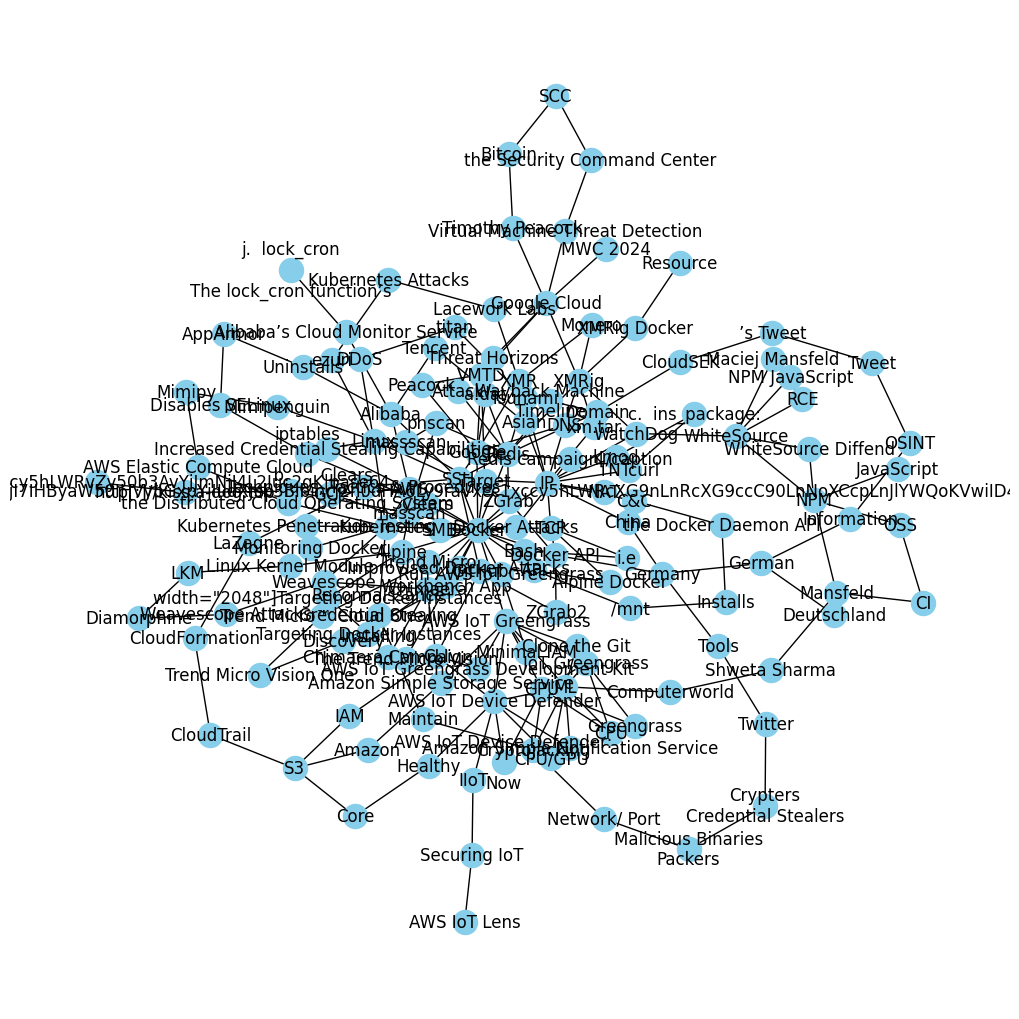

In [21]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [22]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html


### The most important characters in The Witcher

In [23]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Google Cloud': 0.03896103896103896,
 'MWC 2024': 0.006493506493506494,
 'Virtual Machine Threat Detection': 0.012987012987012988,
 'the Security Command Center': 0.012987012987012988,
 'SCC': 0.012987012987012988,
 'Bitcoin': 0.012987012987012988,
 'Timothy Peacock': 0.012987012987012988,
 'XMRig': 0.045454545454545456,
 'Monero': 0.012987012987012988,
 'XMR': 0.012987012987012988,
 'Google': 0.045454545454545456,
 'Threat Horizons': 0.012987012987012988,
 'VMTD': 0.025974025974025976,
 'Peacock': 0.012987012987012988,
 'Target': 0.012987012987012988,
 'Docker': 0.14935064935064937,
 'AWS': 0.03246753246753247,
 'Kubernetes': 0.05194805194805195,
 'Reconnaissance\nCredential Stealing\nInstalling': 0.012987012987012988,
 'Maintain': 0.012987012987012988,
 'Cryptojacking': 0.025974025974025976,
 'Network/ Port': 0.012987012987012988,
 'Malicious Binaries\nPackers': 0.012987012987012988,
 'Crypters\nCredential Stealers': 0.012987012987012988,
 'Twitter': 0.012987012987012988,
 'Tools': 

<Axes: >

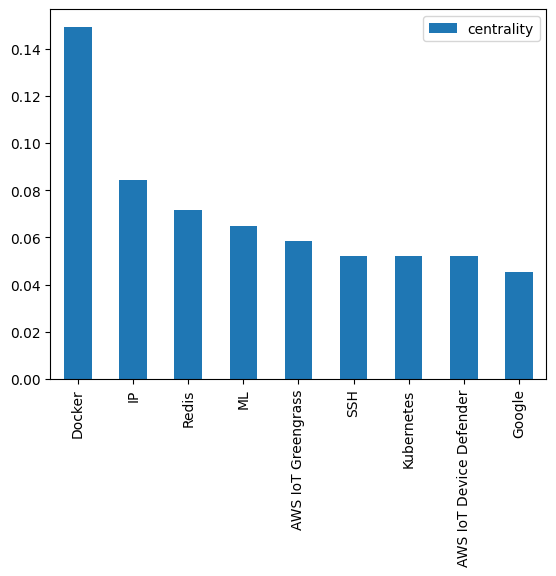

In [24]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

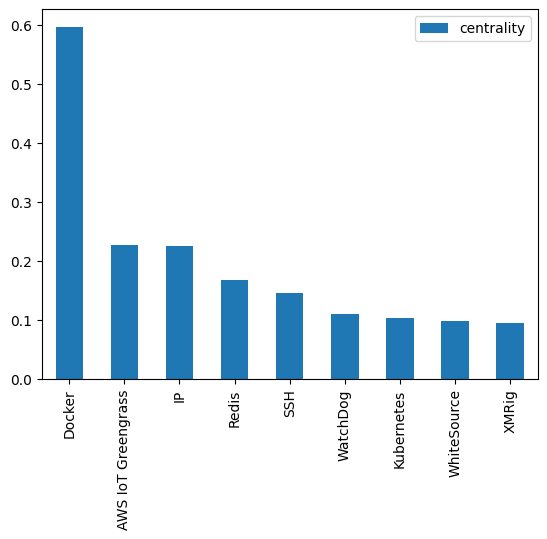

In [25]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

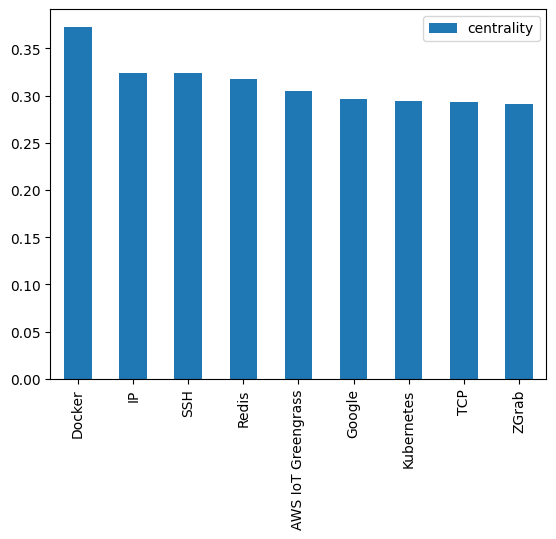

In [26]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [27]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [28]:
!pip install python-louvain

### Community detection

In [29]:
from community import community_louvain

In [30]:
communities = community_louvain.best_partition(G)

In [31]:
communities

{'Google Cloud': 0,
 'MWC 2024': 0,
 'Virtual Machine Threat Detection': 0,
 'the Security Command Center': 0,
 'SCC': 0,
 'Bitcoin': 0,
 'Timothy Peacock': 0,
 'XMRig': 0,
 'Monero': 0,
 'XMR': 0,
 'Google': 0,
 'Threat Horizons': 0,
 'VMTD': 0,
 'Peacock': 0,
 'Target': 0,
 'Docker': 8,
 'AWS': 9,
 'Kubernetes': 9,
 'Reconnaissance\nCredential Stealing\nInstalling': 5,
 'Maintain': 5,
 'Cryptojacking': 5,
 'Network/ Port': 5,
 'Malicious Binaries\nPackers': 5,
 'Crypters\nCredential Stealers': 6,
 'Twitter': 6,
 'Tools': 6,
 'Germany': 6,
 'German': 6,
 'Deutschland': 6,
 'Information': 6,
 'OSINT': 6,
 'Tweet': 6,
 '’s Tweet': 6,
 'CloudSEK': 6,
 'Domain': 8,
 'Redis': 8,
 'Wayback Machine\nTimeline': 8,
 'Attack': 8,
 'Tsunami': 9,
 'titan': 9,
 'DDoS': 9,
 'Linux': 9,
 'SSH': 8,
 'Redis campaign[/caption': 8,
 'Docker Attacks': 8,
 'Bash': 8,
 'i.e': 8,
 'TCP': 8,
 'masscan': 10,
 'Alpine': 10,
 'width="2048"]Targeting Docker Instances': 10,
 'Targeting Docker Instances': 10,
 'Im

In [32]:
nx.set_node_attributes(G, communities, 'group')

In [33]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_2022.html")

witcher_2022.html


### Evolution of characters' importance

In [34]:
from lib.utils.functions import *

In [35]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('2022') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [36]:
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G)


AttributeError: 'DataFrame' object has no attribute 'character_entities'

In [ ]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()